In [2]:
import data.audio_dataset_v1 as data_utils
import models.inversion_v1 as model_utils
from abstract_model import AbstractModel

import torch
import torch.nn as nn
from torch import optim

from argparse import Namespace
import pytorch_lightning as pl
from pytorch_lightning.loggers import TensorBoardLogger

from ipywidgets import IntProgress

In [3]:
AudioDataset = data_utils.AudioDataset
InversionV1 = model_utils.InversionV1

In [6]:
data_paths = {}
data_paths['train'] = '/scratch/prs392/incubator/data/LibriSpeech/train-clean-360'
data_paths['val'] = '/scratch/prs392/incubator/data/LibriSpeech/dev-clean'
data_paths['test'] = '/scratch/prs392/incubator/data/LibriSpeech/test-clean'

def optimizer(model_parameters, hparams):
    optimizer = optim.SGD(model_parameters, lr=hparams.lr)
    scheduler = optim.lr_scheduler.StepLR(optimizer, hparams.scheduler_epoch, hparams.scheduler_step_size)
    return [optimizer], [scheduler]

args = {
    'batch_size': 32, # Compulsory
    'lr': 0.0002, # Compulsory
    'scheduler_epoch': 3, # Compulsory
    'scheduler_step_size': 0.1 # Compulsory
}

hparams = Namespace(**args)

In [26]:
model = AbstractModel(
    hparams=hparams,
    data_paths = data_paths, 
    dataset_model = AudioDataset,
    model = InversionV1(), 
    criterion = nn.MSELoss(),
    optimizer = optimizer
)

model = AbstractModel.load_from_checkpoint('/scratch/prs392/incubator/checkpoints/openl3_librispeech/inversion_v1/no_optimization/version_0/checkpoints/epoch=6.ckpt', 
                                            data_paths = data_paths, 
                                            dataset_model = AudioDataset,
                                            model = InversionV1()
                                          )


In [57]:
audio_dataset = AudioDataset(root_dir='/scratch/prs392/incubator/data/LibriSpeech/train-clean-360')

for i in range(len(audio_dataset)):
    emb, spec, j = audio_dataset[i]
    print(emb.shape, spec.shape, j)
    pred = model(emb)
    print("Embeddings shape: " + str(emb.shape))
    print("Expected Spectrogram shape: " + str(spec.shape))
    print("Predicted Spectrogram shape: " + str(pred.shape))
    if i == 0:
        break

torch.Size([6144]) torch.Size([1, 128, 199]) tensor(120)
Embeddings shape: torch.Size([6144])
Expected Spectrogram shape: torch.Size([1, 128, 199])
Predicted Spectrogram shape: torch.Size([1, 1, 128, 199])


In [58]:
spec

tensor([[[-20.2475, -18.9491, -18.9342,  ..., -17.6072, -18.3747, -20.1541],
         [-18.9063, -18.5394, -19.3261,  ..., -19.6020, -19.1754, -19.3510],
         [-18.3266, -18.3941, -19.7459,  ..., -21.2684, -19.7768, -19.3026],
         ...,
         [-28.4759, -29.3122, -31.6653,  ..., -46.5890, -44.2438, -43.4128],
         [-28.4957, -29.3321, -31.6851,  ..., -46.6089, -44.2636, -43.4326],
         [-28.5080, -29.3443, -31.6974,  ..., -46.6211, -44.2758, -43.4448]]])

In [59]:
pred

tensor([[[[-22.0805, -17.6466, -15.2771,  ..., -15.2594, -15.4097, -20.1352],
          [-18.3349, -15.9406, -15.9273,  ..., -15.3250, -13.4615, -15.6179],
          [-18.1990, -17.4567, -18.1805,  ..., -15.5100, -14.0445, -14.5399],
          ...,
          [-31.7512, -32.3347, -33.7471,  ..., -49.3229, -46.1184, -45.2414],
          [-32.6563, -32.2866, -33.5793,  ..., -47.5841, -45.1034, -44.1493],
          [-36.0914, -34.4745, -36.4950,  ..., -48.0485, -46.0677, -44.5950]]]],
       grad_fn=<NativeBatchNormBackward>)

In [60]:
import matplotlib.pyplot as plt

%matplotlib inline

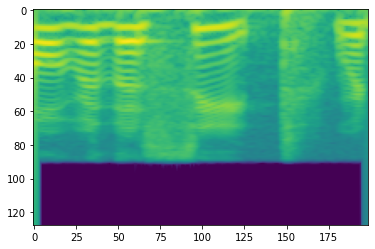

In [61]:
plt.figure()
p = plt.imshow(spec[0,:,:].numpy())

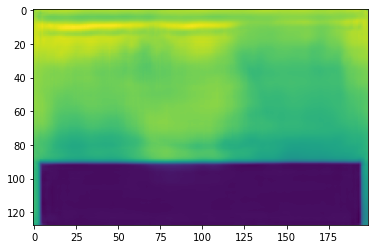

In [62]:
p = plt.imshow(pred[0, 0,:,:].detach().numpy())